# 1. Importaciones

Antes que nada debemos de realizar todas las importaciones pertinentes para el desarrollo de toda la tarea

In [574]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
%matplotlib inline

# 2. PCA

## 2.1 Mean Face

1. Se descargan los archhivos de la pagina web, como esta se descarga en formato .zip, se debe de descromprimir para poder extraer toda la información. Para esto usamos la funcion "download_files" que permite realizar todo lo descrito anteriormente.

In [575]:
def download_files():
    """
    Este metodo descarga los archivos de imagenes si no existen
    """
    path_tar = os.path.join("data",'faces.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as tar:
        tar.extractall(dest_path)
        tar.close()
download_files()

2. Luego se escogen aleatoriamente varios archivos con ayuda de un número random, dependiendo del grado de libertad que le demos al programa este va a elegir unos u otros archivos, aunque el análisis se puede hacer sin aleatorizar los datos. Luego se guardaran dichos datos en un array "X" como se evidencia a continuación:

In [576]:
d_name = 'data/faces/rawdata'
X = []
for nfile in  os.listdir(d_name):
    bytes_read = open(os.path.join(d_name,nfile), "rb").read()
    img = Image.frombytes('L', (128,128), bytes_read)
    X.append(np.array(img).flatten())
X = np.array(X)

3. Después se usa una función básica para poder mostrar una imagen, que se usa más adelante en el código:

In [577]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True,figsize=(9,9))
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    ax.grid(False)
    return fig,ax

In [578]:
def plot_n_images(data, messages, save_path=None):
    i = 0
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,len(data), constrained_layout=True,figsize=(15,15))
    for item in range(len(data)):
        ax[item].imshow(fn_shape(data[item]))
        ax[item].set_title(label=messages[i])
        ax[item].grid(False)
        i += 1
    plt.show()
    
    if save_path:
        fig.savefig(f'images/{save_path}')

4. Se calcula el promedio de todos los datos obtenidos:

In [579]:
X_mean = X.mean(axis=0)

5. Por último se muestra la imagen resultante con la media de todos los datos para poder visualizar la "Cara media":

(<Figure size 900x900 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

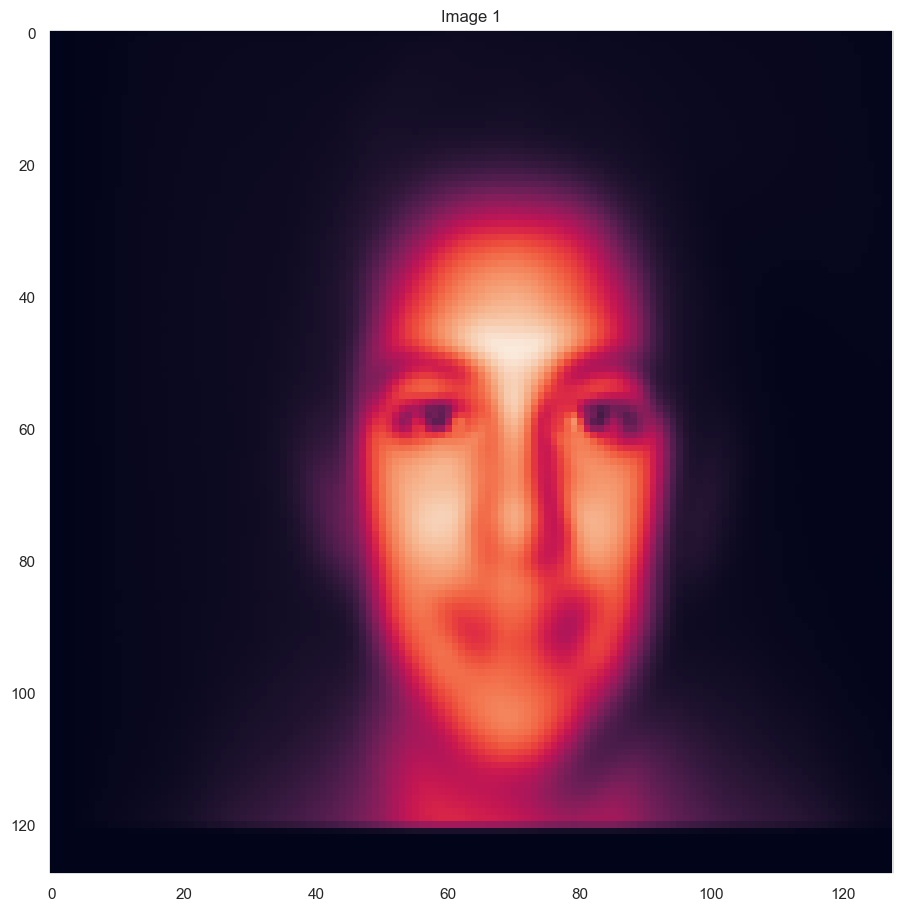

In [580]:
plot_1_images(X_mean)

## 2.2. PCA

1. Debemos de calcular la media de todos los datos selecionados, esto simplemente se usa con una funcion propia de los arreglos o matrices.

In [581]:
x_mean = X.mean(axis=0)

2. Luego se deben de centrar los datos con la media calculada, esto es util al utilizar PCA ya que nos ayuda a tener interpretaiones mas clara y además, como se tiene que calcular la covarianza, esta se ve afectada por la ubicacion de los datos en relacion al origen.

In [582]:
x_center = X - x_mean

3. Se aplica PCA con un valor de 671 componentes, ya que para este punto necesitamos una varianza acumulativa del 99%, y para lograr ese porcentaje se debe tomar esa cantidad de componentes.

In [583]:
pca = PCA(n_components=700)

4. El metodo fit_tranform combina dos funciones, fit y tranform, que se traduce basicamente en ajustar PCA a los datos de la imagenes pasandole como parametro los datos ya centralizados.

In [584]:
x_reduced = pca.fit_transform(x_center)

5. Se calcula los eigen valores y las eigen caras que son basicamente los eigen vectores.

In [585]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

6. Para calcular la proporcion de la varianza en cada componente y sumarlas entre si

In [586]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
cumulative_variance

array([0.32899813, 0.42589729, 0.50936353, 0.55317853, 0.59316252,
       0.62861245, 0.65654767, 0.67537477, 0.69160962, 0.70486311,
       0.7151311 , 0.72533207, 0.73407444, 0.74243094, 0.75008006,
       0.75717165, 0.76402061, 0.77052349, 0.77613818, 0.78153153,
       0.7867906 , 0.79181462, 0.79650494, 0.80105448, 0.80533513,
       0.80939868, 0.81322072, 0.81686706, 0.8203331 , 0.82364706,
       0.82677309, 0.82978946, 0.83270684, 0.83549755, 0.83816703,
       0.84076534, 0.8432306 , 0.84567601, 0.84801365, 0.85025681,
       0.85245694, 0.85458869, 0.85665014, 0.85863352, 0.86056379,
       0.8624266 , 0.86426448, 0.866076  , 0.86775362, 0.86941476,
       0.87101456, 0.87256346, 0.87407455, 0.87557225, 0.87701541,
       0.87838855, 0.87975567, 0.8810898 , 0.88241137, 0.88368933,
       0.88495002, 0.88617824, 0.88737094, 0.88854908, 0.88968729,
       0.8908084 , 0.89189417, 0.89297391, 0.89404174, 0.89508525,
       0.8961037 , 0.89710375, 0.89809835, 0.89907808, 0.90002

Como se pueden visualizar en los datos anteriores, se obtiene para cada componente su suma acumulada de varianza, esto con el fin de determinar que cantidad de componentes se necesitan para suplir el porcentaje de explicacion de la varianza. También se observa que cada valor del arreglo represente un componente de PCA, es decir, para encontrar el componente adecuado siempre se le debe de sumar una unidad al índice, ya que las listas siempre empiezan por 0

7. Calculamos la cantidad de componentes que se necesitan para contener el 90% de las caracteristica de las caras, para esto usamos la funcion de numpy "argmax" que me repermite devolver el índice de una condicion específica, en este caso es cuando la varianza acumulada sea mayor o igual 0.9.

In [587]:
num_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print("La cantidad de componentes que se necesitan para contener el 90% de las caracteristicas es de:",num_components_90,"componentes")

La cantidad de componentes que se necesitan para contener el 90% de las caracteristicas es de: 75 componentes


### 2.2.1 Reconstruccion De Caras - Analisis

El valor correspondiente a la explicacion del 99%, como se mencionó anteriormente, solo se podia lograr aplicando PCA con 700 componentes, para dar prueba de esto, vamos a tomar el último valor de la varianza acumulada y observar el porcentaje de esta.

In [588]:
print("El valor total de la varianza acumulada de todos los componentes es:",cumulative_variance[-1],"ó",round(cumulative_variance[-1]*100,1),"%")

El valor total de la varianza acumulada de todos los componentes es: 0.9905631344586766 ó 99.1 %


Quiere decir que para mantener el 99% de los datos necesitamos la siguiente cantidad de componentes:

In [589]:
print("Para mantener los componentes que explican el 99% de la varianza es de",np.argmax(cumulative_variance >= 0.99) + 1,"componentes")
print("Para mantener los componentes que explican el 85% de la varianza es de",np.argmax(cumulative_variance >= 0.85) + 1,"componentes")

Para mantener los componentes que explican el 99% de la varianza es de 674 componentes
Para mantener los componentes que explican el 85% de la varianza es de 40 componentes


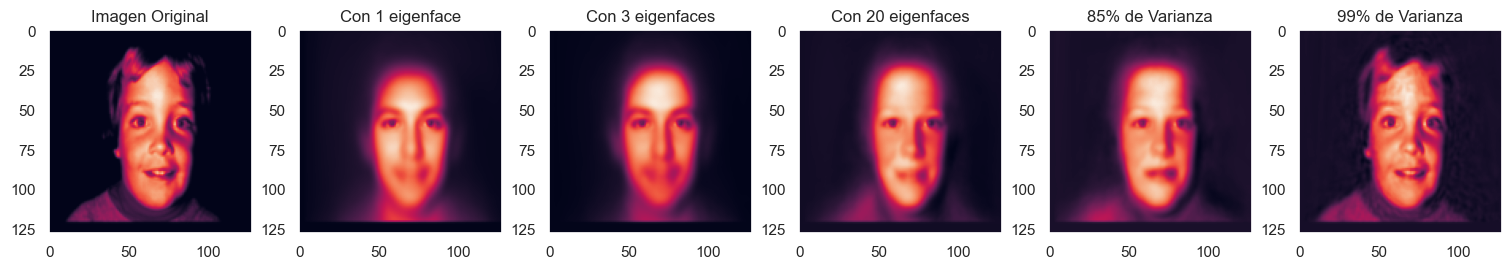

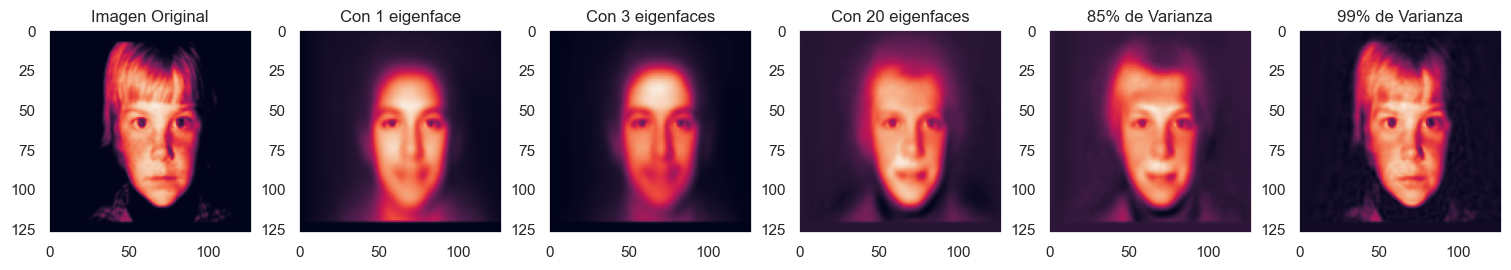

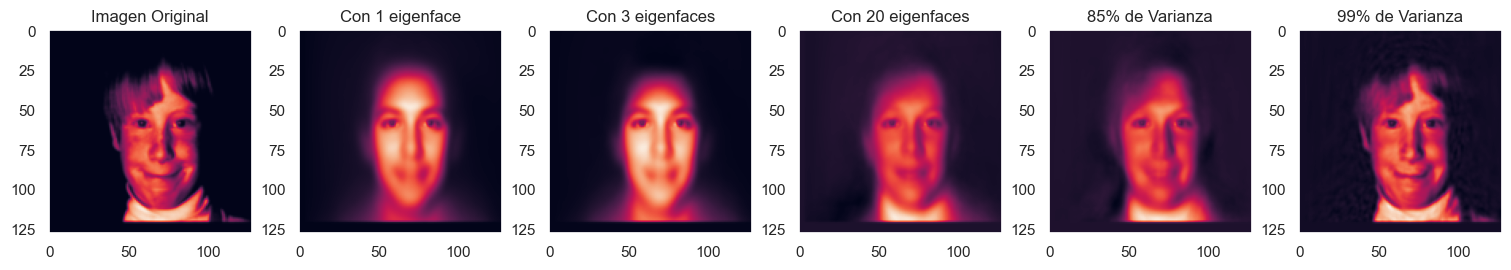

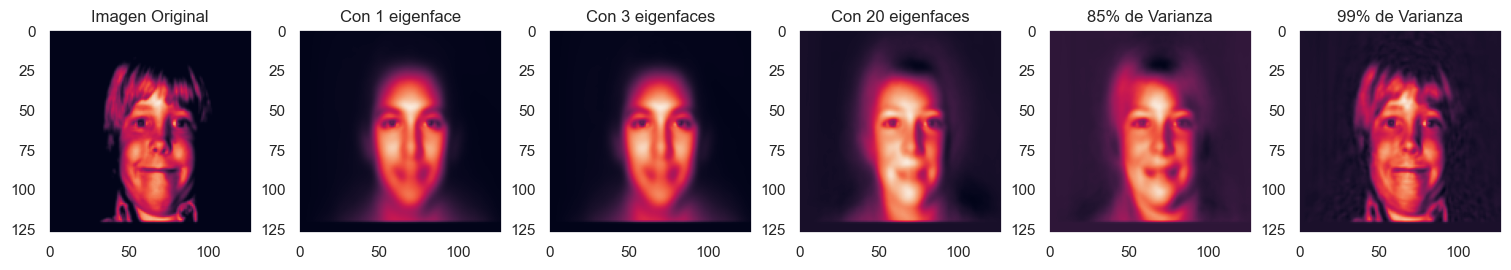

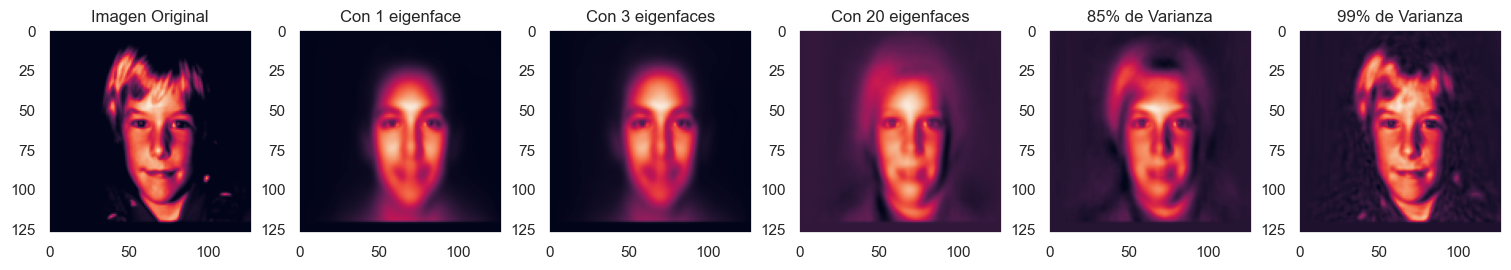

In [590]:
set_face_1 = [X[0],
            np.dot(x_reduced[0].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + x_mean,
            np.dot(x_reduced[0].reshape(1,-1)[:,:3], eigen_faces[:3,:]) + x_mean,
            np.dot(x_reduced[0].reshape(1,-1)[:,:20], eigen_faces[:20,:]) + x_mean,
            np.dot(x_reduced[0].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.85) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.85) + 1),:]) + x_mean,
            np.dot(x_reduced[0].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.99) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.99) + 1),:]) + x_mean]

set_face_2 = [X[1],
            np.dot(x_reduced[1].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + x_mean,
            np.dot(x_reduced[1].reshape(1,-1)[:,:3], eigen_faces[:3,:]) + x_mean,
            np.dot(x_reduced[1].reshape(1,-1)[:,:20], eigen_faces[:20,:]) + x_mean,
            np.dot(x_reduced[1].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.85) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.85) + 1),:]) + x_mean,
            np.dot(x_reduced[1].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.99) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.99) + 1),:]) + x_mean]

set_face_3 = [X[2],
            np.dot(x_reduced[2].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + x_mean,
            np.dot(x_reduced[2].reshape(1,-1)[:,:3], eigen_faces[:3,:]) + x_mean,
            np.dot(x_reduced[2].reshape(1,-1)[:,:20], eigen_faces[:20,:]) + x_mean,
            np.dot(x_reduced[2].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.85) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.85) + 1),:]) + x_mean,
            np.dot(x_reduced[2].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.99) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.99) + 1),:]) + x_mean]

set_face_4 = [X[3],
            np.dot(x_reduced[3].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + x_mean,
            np.dot(x_reduced[3].reshape(1,-1)[:,:3], eigen_faces[:3,:]) + x_mean,
            np.dot(x_reduced[3].reshape(1,-1)[:,:20], eigen_faces[:20,:]) + x_mean,
            np.dot(x_reduced[3].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.85) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.85) + 1),:]) + x_mean,
            np.dot(x_reduced[3].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.99) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.99) + 1),:]) + x_mean]

set_face_5 = [X[4],
            np.dot(x_reduced[4].reshape(1,-1)[:,:1], eigen_faces[:1,:]) + x_mean,
            np.dot(x_reduced[4].reshape(1,-1)[:,:3], eigen_faces[:3,:]) + x_mean,
            np.dot(x_reduced[4].reshape(1,-1)[:,:20], eigen_faces[:20,:]) + x_mean,
            np.dot(x_reduced[4].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.85) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.85) + 1),:]) + x_mean,
            np.dot(x_reduced[4].reshape(1,-1)[:,:(np.argmax(cumulative_variance >= 0.99) + 1)], eigen_faces[:(np.argmax(cumulative_variance >= 0.99) + 1),:]) + x_mean]

messages_list = ["Imagen Original","Con 1 eigenface","Con 3 eigenfaces","Con 20 eigenfaces","85% de Varianza","99% de Varianza"]

plot_n_images(set_face_1,messages_list)
plot_n_images(set_face_2,messages_list)
plot_n_images(set_face_3,messages_list)
plot_n_images(set_face_4,messages_list)
plot_n_images(set_face_5,messages_list)

Se concluye de forma evidente que entre más componentes más porcentaje de varianza acumulada exista más definicion y nitidez tendran las imagenes, aunque se sigue perdiendo cierta cantidad de información en la imagen y por ende pierde calidad, pero el resultado es bastante parecido al original.

# 3. K-Means

Para este punto debemos de reducir la dimensionalidad de las imagenes a 5 dimensiones utilizando PCA

In [591]:
pca = PCA(n_components=5)
x_reduced = pca.fit_transform(x_center)
eigen_faces = pca.components_

Luego creamos la clase que implemententara el aprendizaje no supervisado K-means

In [602]:
class KmeansCustom:
    def __init__(self, clusters):
        self.clusters = clusters
        self.max_iters = 200 # Número maximo de iteraciones
        self.random_state = None # Semilla aleatoria (None para no fijar la semilla)
        self.centroids = None
        
    def fit(self, x):
        # Inicializamos los centroides aleatorios
        if self.random_state:
            np.random.seed(self.random_state)
        idx = np.random.choice(len(x), self.clusters, replace=False)
        self.centroids = x[idx]
        
        for _ in range(self.max_iters):
            # Asignar cada punto de datos al centroide mas cercano
            labels = self._assign_clusters(x)
            
            # Actualizar l;os centroides con el promedio de los puntos asignados
            new_centroids = np.array([x[labels == i].mean(axis=0) for i in range(self.clusters)])
            
            # Comprobar si los centroides han convergido
            if np.all(self.centroids == new_centroids):
                break
                
            self.centroids = new_centroids

    def predict(self, x):
        return self._assign_clusters(x)
            
    def _assign_clusters(self, x):
        # Distancia utilizando normal L1 (valor absoluto)
        distances = np.abs(x[:, np.newaxis] - self.centroids).sum(axis=2)
        
        return np.argmin(distances, axis=1)

In [603]:
k_means = KmeansCustom(clusters=7)

In [604]:
non_black_indices = []
for i, image in enumerate(x_reduced):
    if np.sum(image) > 0:
        non_black_indices.append(i)
        
x_reduced_non_black = x_reduced[non_black_indices]

k_means.fit(x_reduced_non_black)

In [605]:
labels = k_means.predict(x_reduced)
centroids = k_means.centroids

In [606]:
centroids

array([[ 3611.3375936 ,   186.08882256,  -788.33410727,  -195.26151655,
           57.75739012],
       [-1111.36560486,   143.53887705,  1487.78253747,  1042.90193123,
          242.93754839],
       [ 1211.70723394,  1307.49739833, -1013.67588201,    87.38050387,
          712.17042504],
       [ 1461.04277746, -1153.90558553,  1696.32521789,  -248.33869779,
          277.97163591],
       [ 6003.98084674,  9459.22357767,  4861.31388943, -2316.55007219,
        -2139.91999293],
       [ 1887.75088046,  -111.74151639,   453.95416118,  1330.51606655,
         -484.73439601],
       [ 6701.43022622,  1918.64831865,   -66.2584775 ,   745.96060317,
         2514.59890653]])

In [607]:
distances = np.abs(x_reduced[:, np.newaxis, :] - centroids)

# Suma las distancias a lo largo de las dimensiones para obtener la distancia L1
distances = distances.sum(axis=2)

# Encuentra los índices de los 4 puntos más cercanos a cada centroide
indices_4_closest = np.argpartition(distances, 4, axis=0)[:4]
indices_4 = np.argmin

In [608]:
indices_4_closest

array([[3474, 1951, 1983, 1977, 3194, 1639, 2022],
       [3356, 1241, 2456, 3304, 3193,  726, 2023],
       [3082, 1674, 2442,  847, 3117,  971, 2076],
       [3081,  272, 2065, 3511, 3124,  708, 2060]], dtype=int64)

In [609]:
distances

array([[ 4064.73736244,  7399.97937462,  4152.46700637, ...,
        24410.34231052,  3110.45835868, 11542.89579676],
       [ 2414.77077626,  9766.42739879,  5415.69603488, ...,
        22524.79706596,  6825.15572639, 11047.32495307],
       [ 8039.36226794,  3218.83997404,  6817.66764844, ...,
        25660.09287491,  4188.3932264 , 13114.97253871],
       ...,
       [ 6561.9535541 ,  3604.5212502 ,  5918.51010403, ...,
        25803.48164502,  4930.6117907 , 13596.66426832],
       [10534.68033867,  4910.9418409 ,  8518.87473787, ...,
        25959.0836339 ,  9441.12735325, 16133.33982674],
       [ 5747.24557787,  3894.58727843,  5066.13658323, ...,
        24942.15322118,  2514.04608182, 11363.4414735 ]])

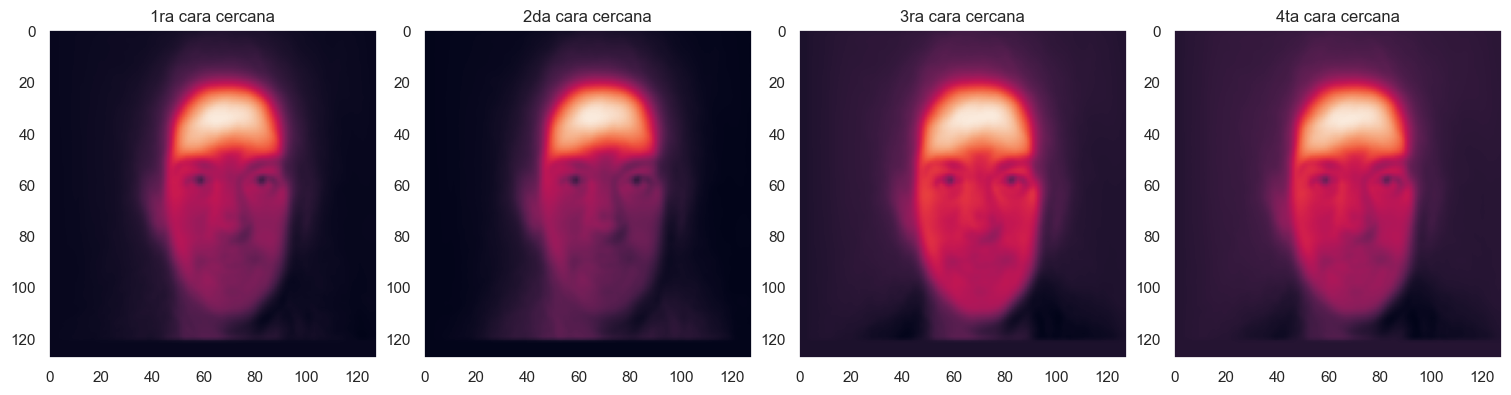

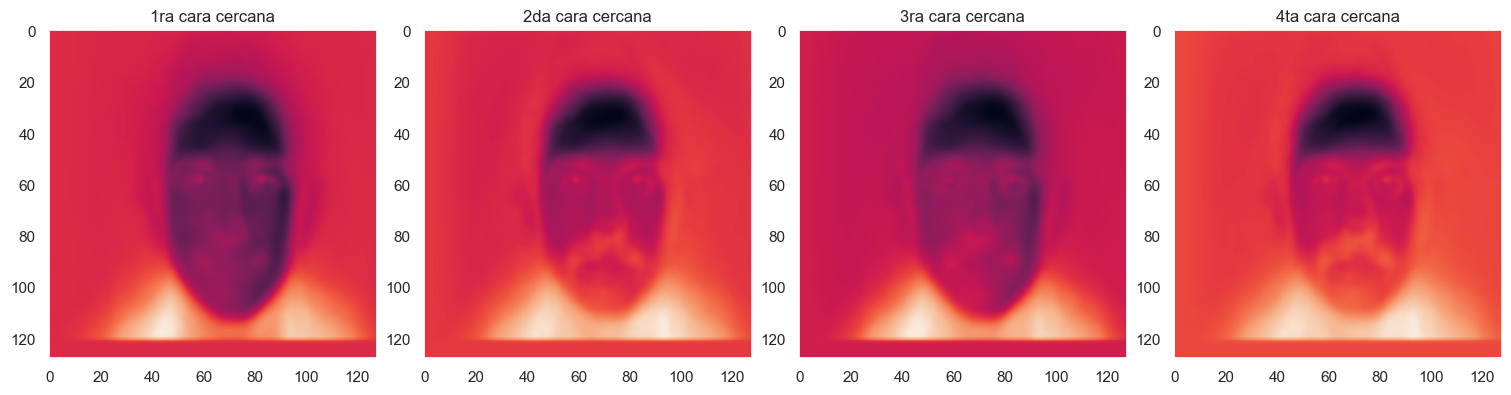

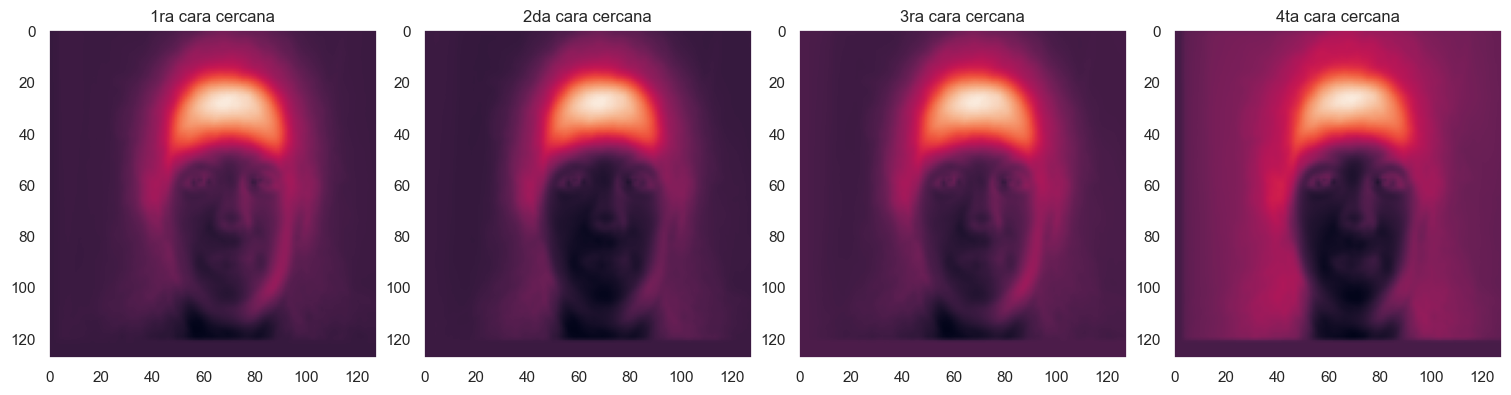

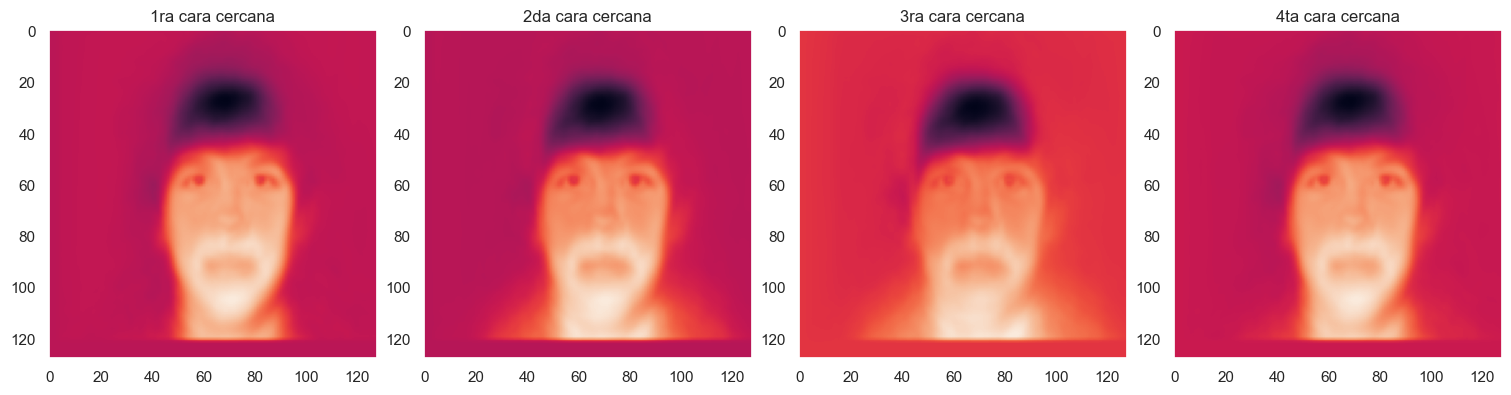

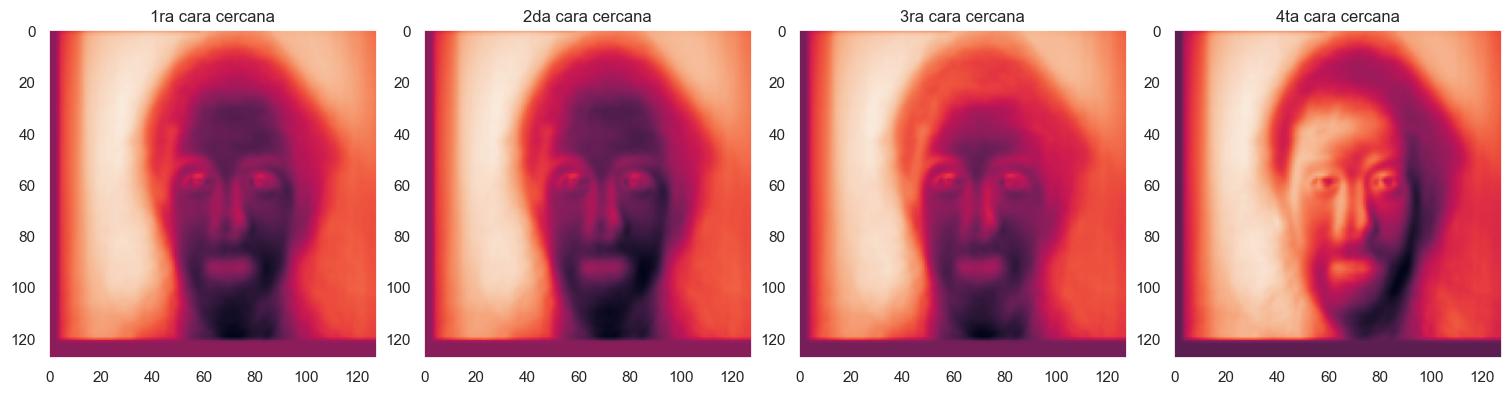

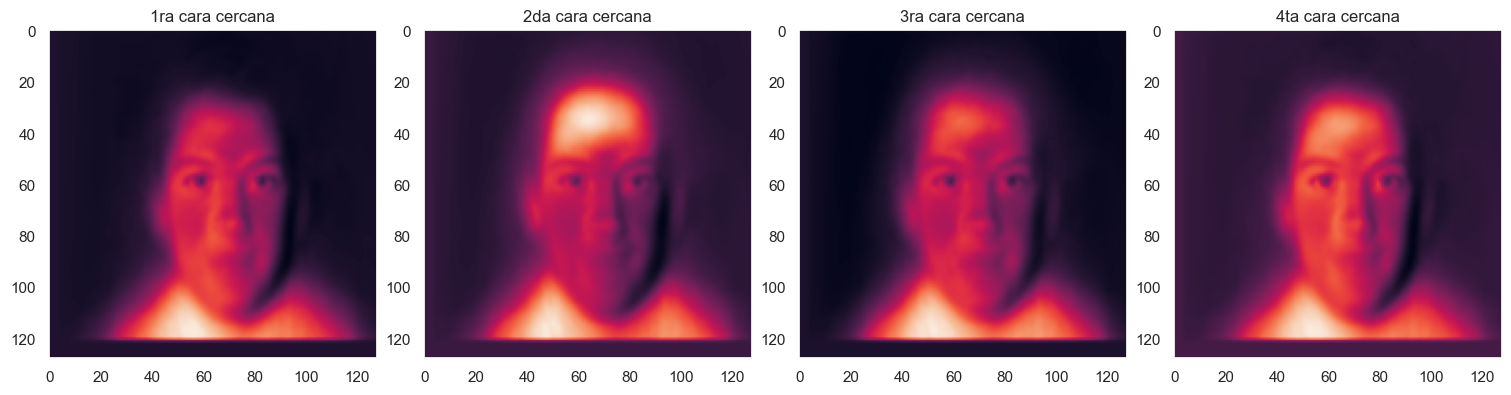

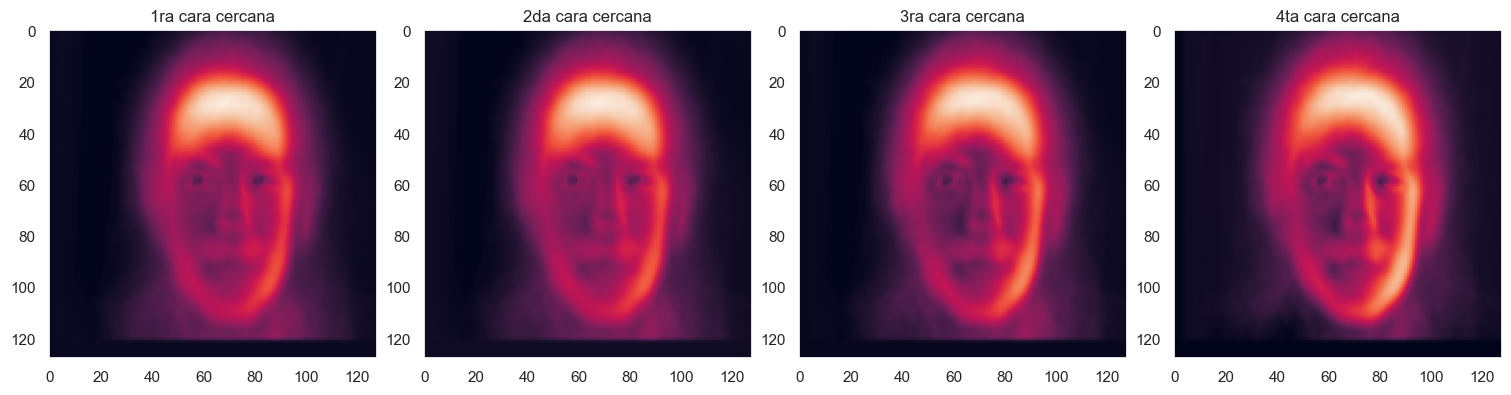

In [610]:
def setter(array, index, data):
    for value in index:
        array.append(np.dot(data[value].reshape(1,-1),eigen_faces))

set1 = []
set2 = []
set3 = []
set4 = []
set5 = []
set6 = []
set7 = []

messages_kmeans = ["1ra cara cercana",
                   "2da cara cercana",
                   "3ra cara cercana",
                   "4ta cara cercana"]

setter(set1, indices_4_closest[:,0], x_reduced)
setter(set2, indices_4_closest[:,1], x_reduced)
setter(set3, indices_4_closest[:,2], x_reduced)
setter(set4, indices_4_closest[:,3], x_reduced)
setter(set5, indices_4_closest[:,4], x_reduced)
setter(set6, indices_4_closest[:,5], x_reduced)
setter(set7, indices_4_closest[:,6], x_reduced)


plot_n_images(set1,messages_kmeans)
plot_n_images(set2,messages_kmeans)
plot_n_images(set3,messages_kmeans)
plot_n_images(set4,messages_kmeans)
plot_n_images(set5,messages_kmeans)
plot_n_images(set6,messages_kmeans)
plot_n_images(set7,messages_kmeans)

Si intentamos reconstruir la imagen al ver que solo son 5 componentes realmente no se tienen resultamos muy claros, asi que tomare el indice que me arroga cada imagen carcana a los centroides y voy a graficarlas desde lso datos originales para observar su similitudes

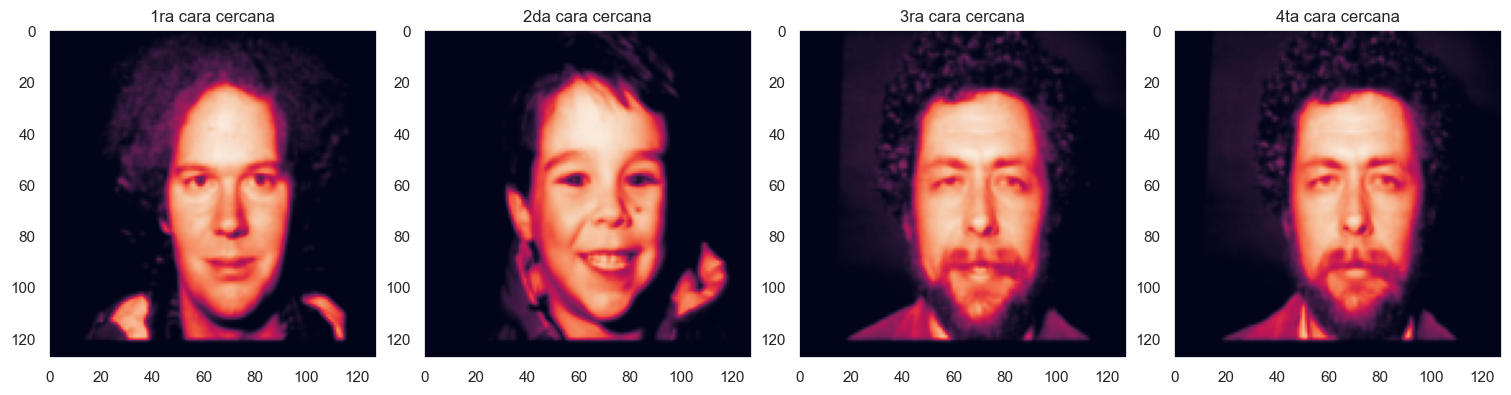

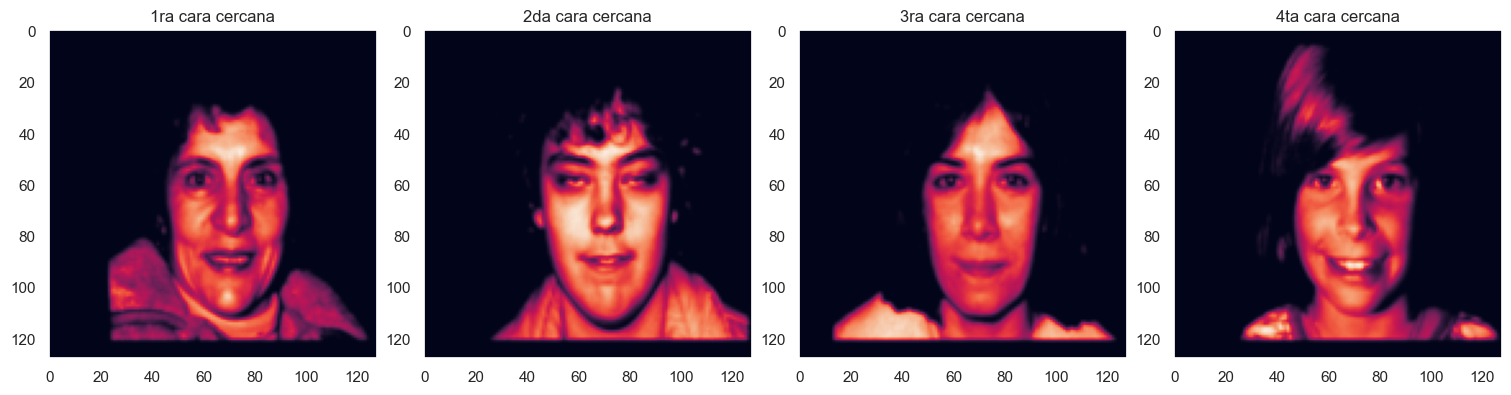

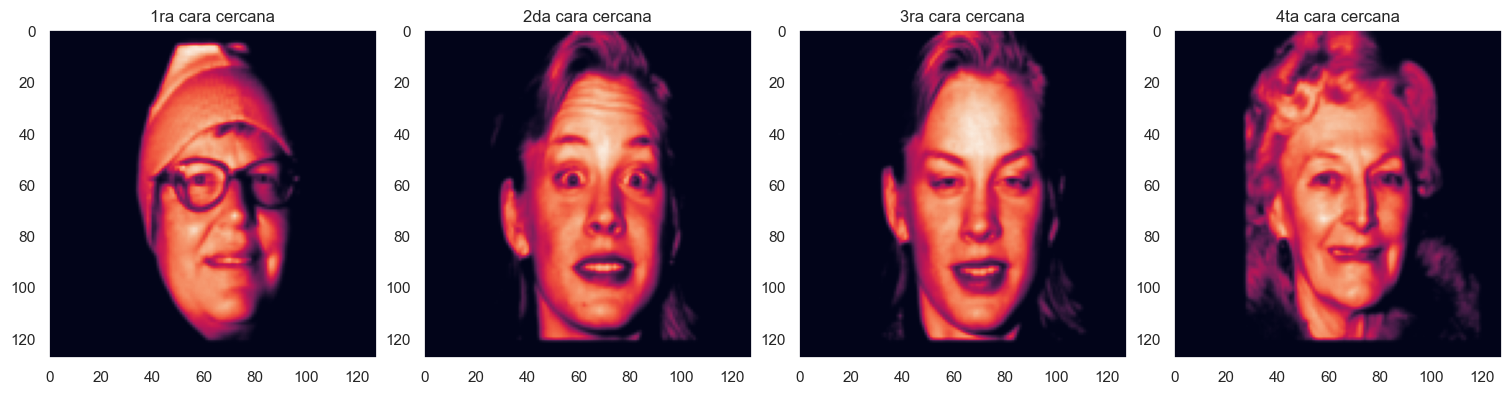

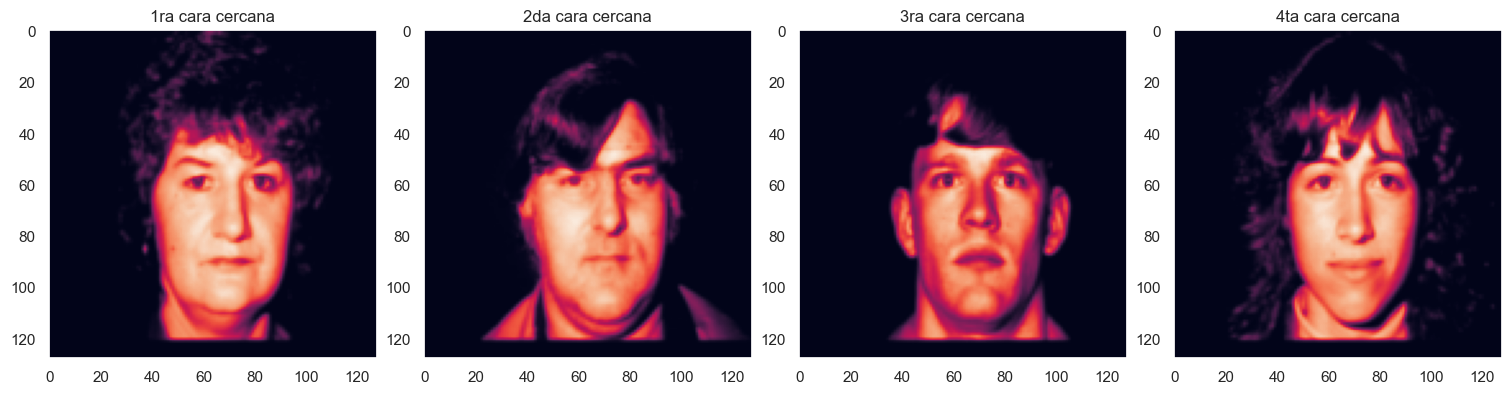

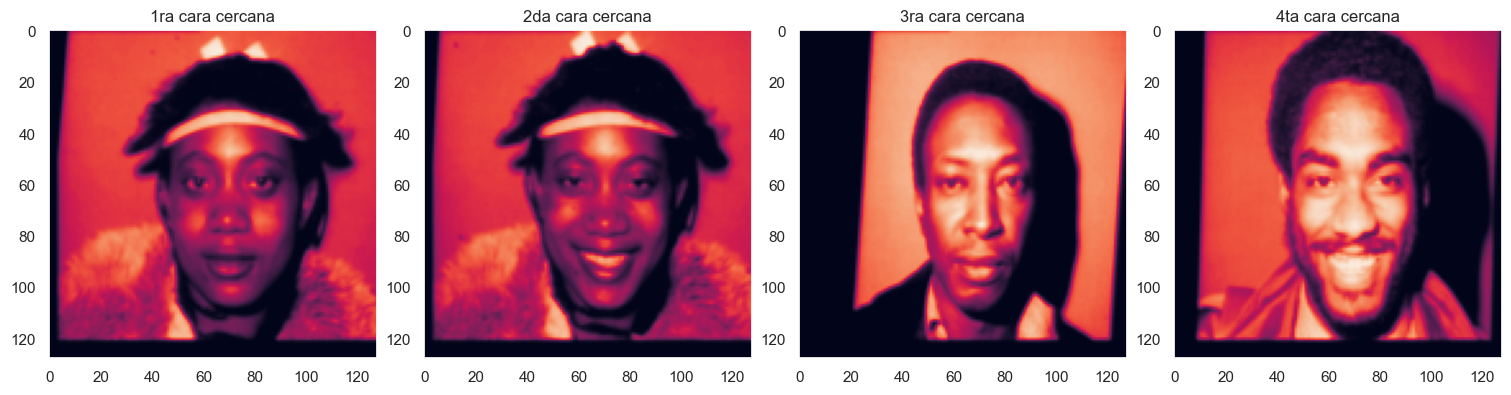

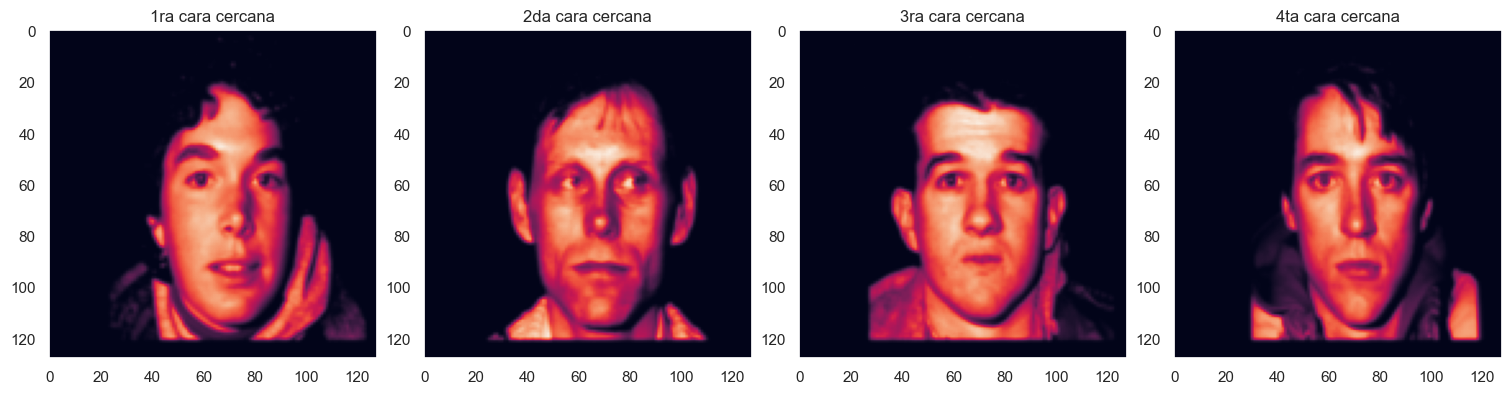

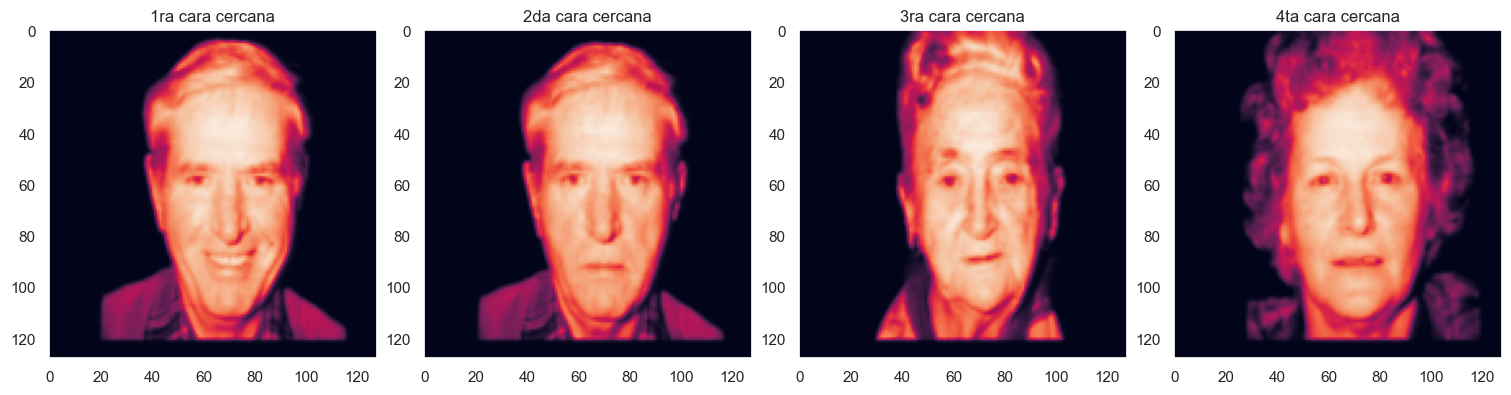

In [611]:
def setter_original(array, index, data):
    for value in index:
        array.append(data[value])

set1 = []
set2 = []
set3 = []
set4 = []
set5 = []
set6 = []
set7 = []
setter_original(set1, indices_4_closest[:,0], X)
setter_original(set2, indices_4_closest[:,1], X)
setter_original(set3, indices_4_closest[:,2], X)
setter_original(set4, indices_4_closest[:,3], X)
setter_original(set5, indices_4_closest[:,4], X)
setter_original(set6, indices_4_closest[:,5], X)
setter_original(set7, indices_4_closest[:,6], X)

plot_n_images(set1,messages_kmeans)
plot_n_images(set2,messages_kmeans)
plot_n_images(set3,messages_kmeans)
plot_n_images(set4,messages_kmeans)
plot_n_images(set5,messages_kmeans)
plot_n_images(set6,messages_kmeans)
plot_n_images(set7,messages_kmeans)